In [1]:
import pandas as pd

In [3]:
raw = pd.read_csv('./data/IRIS.csv')
raw.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
raw['id'] = range( len(raw) )

In [8]:
# choose 100 iris randomly and set them as a train set
train = raw.sample( 100, replace = False, random_state = 42).reset_index( drop = True )
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,id
0,6.1,2.8,4.7,1.2,Iris-versicolor,73
1,5.7,3.8,1.7,0.3,Iris-setosa,18
2,7.7,2.6,6.9,2.3,Iris-virginica,118
3,6.0,2.9,4.5,1.5,Iris-versicolor,78
4,6.8,2.8,4.8,1.4,Iris-versicolor,76


In [9]:
# set the rest of them as a train set
test = raw.loc[ ~raw['id'].isin(train['id']) ].reset_index( drop = True )

# Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt = DecisionTreeClassifier(min_samples_split = 10)

In [12]:
# train the decision tree model with the train data
dt.fit( train[['sepal_length','sepal_width','petal_length','petal_width']], train['species'] )

DecisionTreeClassifier(min_samples_split=10)

In [13]:
# lets predict
predictions = dt.predict( test[['sepal_length','sepal_width','petal_length','petal_width']])

In [19]:
# lets check the accuracy
(pd.Series(predictions) == test['species']).mean()

0.92

visualize and interpret

In [20]:
# set the basic figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,10

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt

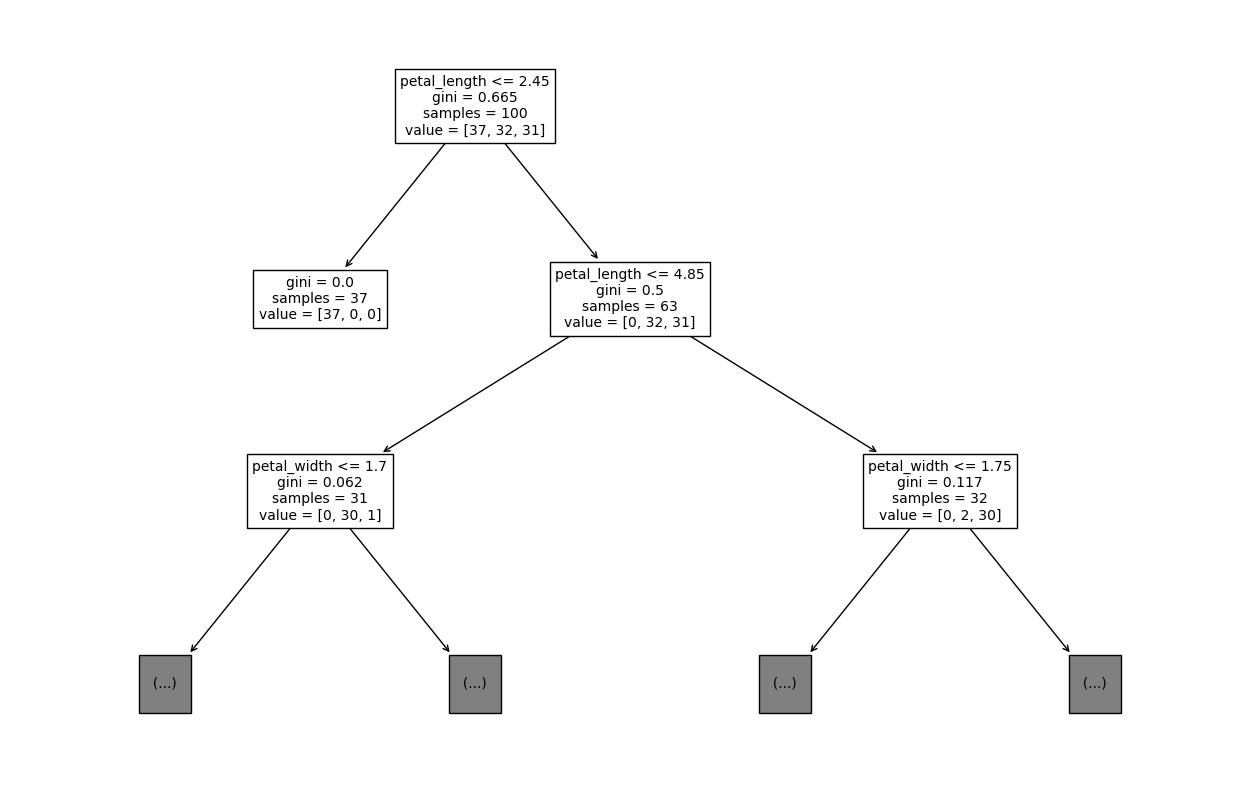

In [26]:
a = tree.plot_tree(dt, feature_names = ['sepal_length','sepal_width','petal_length','petal_width'], max_depth = 2, fontsize = 10 )

# Basic Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [30]:
dt = DecisionTreeClassifier( min_samples_split = 10 )

In [33]:
scores = cross_val_score( dt, raw[['sepal_length','sepal_width','petal_length','petal_width']], raw['species'], cv = 5, scoring = 'accuracy')